### Simple Linear Regression
    We are going to predict the exam score of the student by using the hours of study by using a simple Linear Regression model in python. 
        Hours - independent continuous variable
        Scores - dependent continuous variable        

### Importing Required Libraries and Read Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('data.csv')

### Shape and Columns In data

In [2]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

In [4]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

### Monotonic Relationship Between Feature and Label

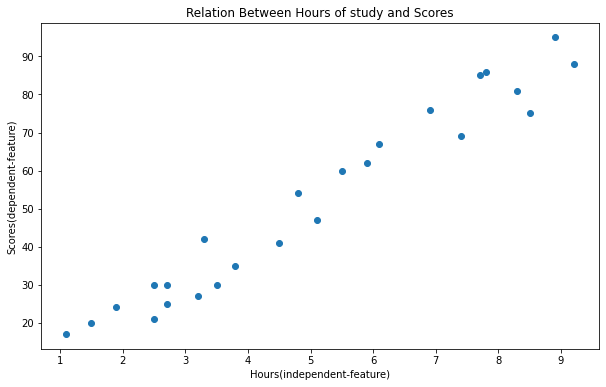

In [5]:
figure = plt.figure(figsize=(10,6))
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel('Hours(independent-feature)')
plt.ylabel('Scores(dependent-feature)')
plt.title("Relation Between Hours of study and Scores")
plt.show()

### Dividing a data into Training and Testing Phase

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['Hours']],df['Scores'],test_size = 0.2)

### Linear Regression Model

In [7]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()

### Cross Validation Accuracy

In [8]:
from sklearn.model_selection import KFold,cross_val_score
fold = KFold(n_splits=5, random_state=0, shuffle=True)
scores = cross_val_score(Lr, x_train, y_train, scoring='r2', cv=fold)
scores.mean()

0.9135817057683836

### Training Data

In [9]:
model = Lr.fit(x_train,y_train)

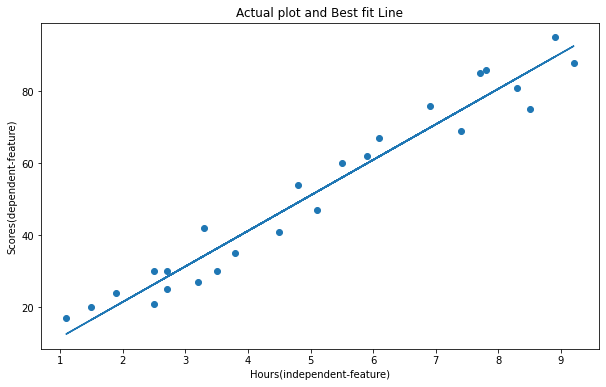

In [10]:
y = Lr.coef_*df[['Hours']]+Lr.intercept_  # y = mx+c 
figure = plt.figure(figsize=(10,6))
plt.scatter(df['Hours'],df['Scores'])
plt.plot(df['Hours'],y)
plt.xlabel('Hours(independent-feature)')
plt.ylabel('Scores(dependent-feature)')
plt.title("Actual plot and Best fit Line")
plt.show()

### Prediction of test data

In [11]:
Predicted = model.predict(x_test)

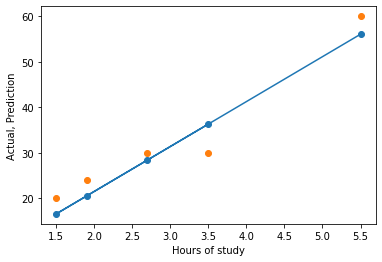

In [12]:
plt.scatter(x_test,Predicted)
plt.plot(x_test,Predicted)
plt.scatter(x_test,y_test)
plt.xlabel('Hours of study')
plt.ylabel('Actual, Prediction')
plt.yticks()
plt.show()

### Mean Squared Error

In [13]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,Predicted)

3.7601380967692792

### Prediction of future Data 

In [14]:
model.predict(np.array(9.25).reshape(1,1))

array([93.08447004])